In [1]:
from tbparse import SummaryReader
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def parse_data(log_dir):
    trials =os.listdir(log_dir)
    trials = sorted(trials,key=lambda x:int(x.split("_")[1]))

    trail_data = {}
    for i,trial in enumerate(trials):
        reader = SummaryReader(os.path.join(log_dir,trial))
        df = reader.scalars
        tags = np.unique(df["tag"])

        trail_data[i] = { tag:df[df["tag"]==tag]["value"].values  for tag in tags}
    return trail_data

In [3]:
custom_path ="results/lightning_logs_custom"
DLV3_path ="results/lightning_logs_DLV3"
unet_path ="results/lightning_logs_unet"

In [4]:
data_custom = parse_data(custom_path)
data_DLV3 = parse_data(DLV3_path)
data_unet = parse_data(unet_path)

In [5]:
data_custom[0].keys()

dict_keys(['Test Acc_epoch', 'Test Acc_step', 'Test Loss_epoch', 'Test Loss_step', 'Test dice_coef_epoch', 'Test dice_coef_step', 'Test mIoU_epoch', 'Test mIoU_step', 'Train Acc_epoch', 'Train Acc_step', 'Train Loss_epoch', 'Train Loss_step', 'Train dice_coef_epoch', 'Train dice_coef_step', 'Train mIoU_epoch', 'Train mIoU_step', 'Validation Acc_epoch', 'Validation Acc_step', 'Validation Loss_epoch', 'Validation Loss_step', 'Validation dice_coef_epoch', 'Validation dice_coef_step', 'Validation mIoU_epoch', 'Validation mIoU_step', 'epoch', 'hp_metric'])

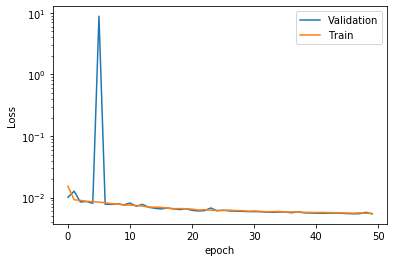

In [6]:
x = np.arange(50)
plt.plot(x,data_DLV3[5]["Validation Loss_epoch"],label= "Validation")
plt.plot(x,data_DLV3[5]["Train Loss_epoch"],label = "Train")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.yscale("log")

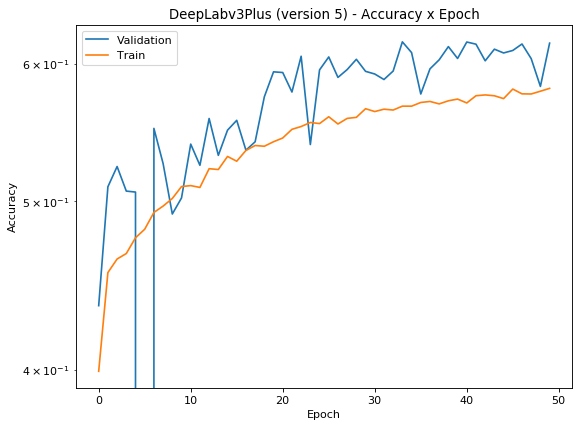

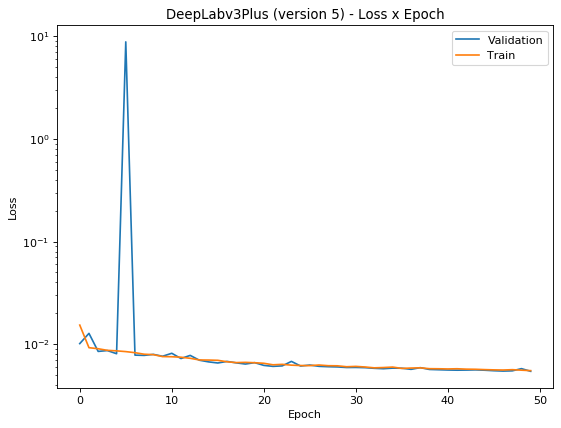

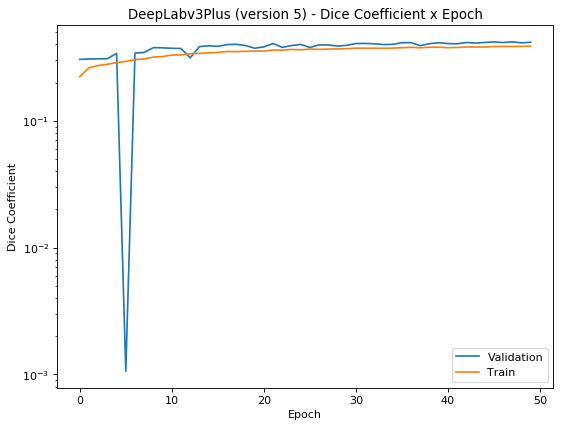

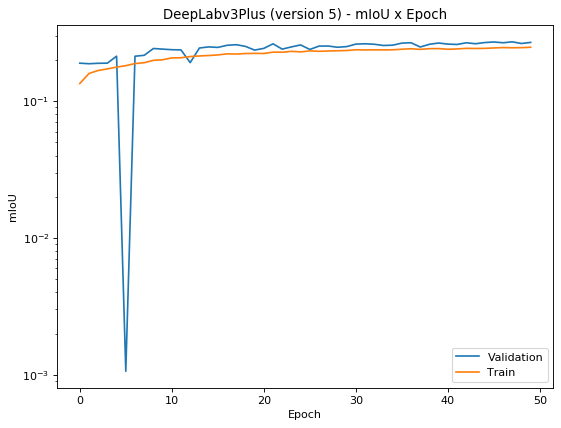

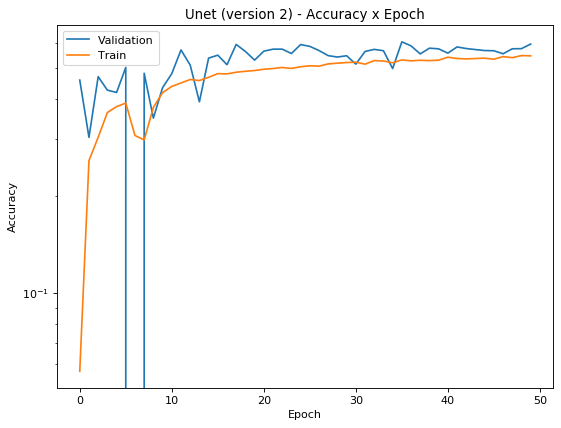

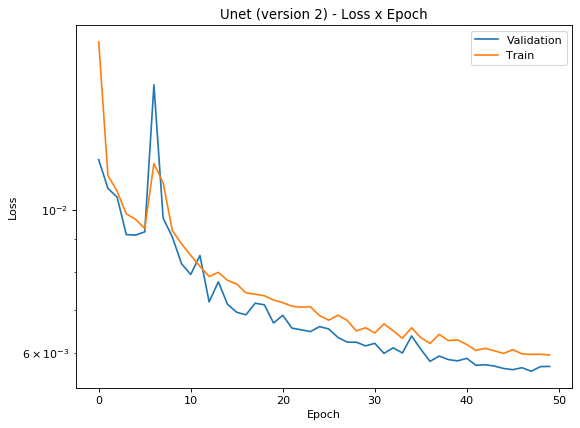

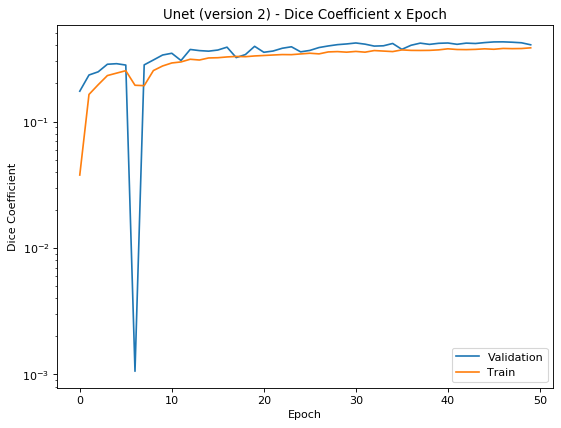

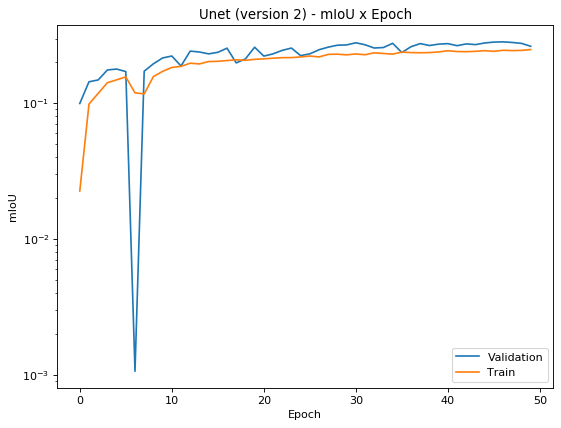

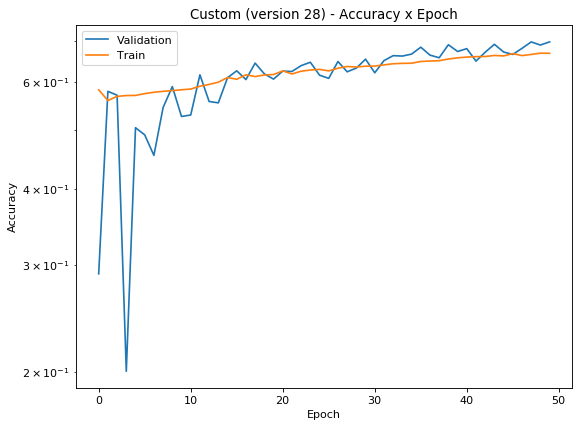

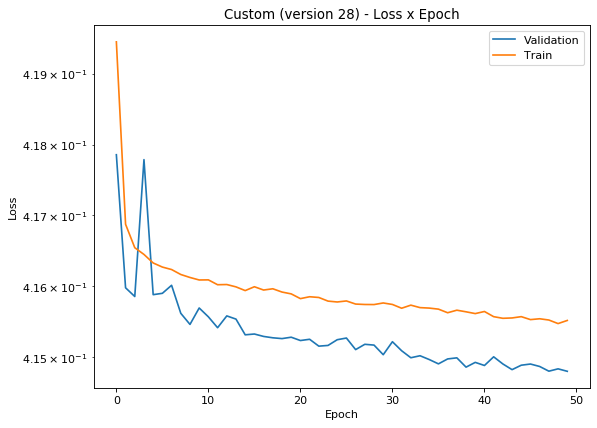

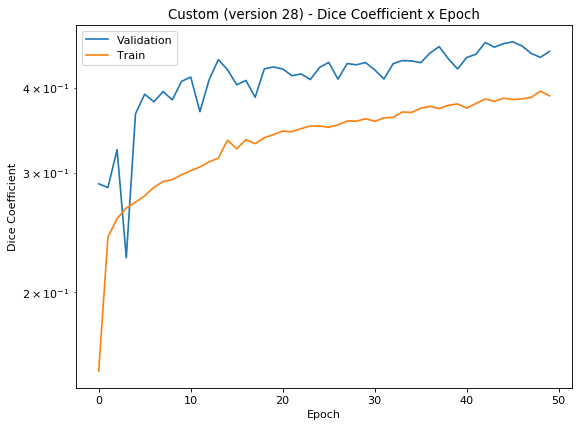

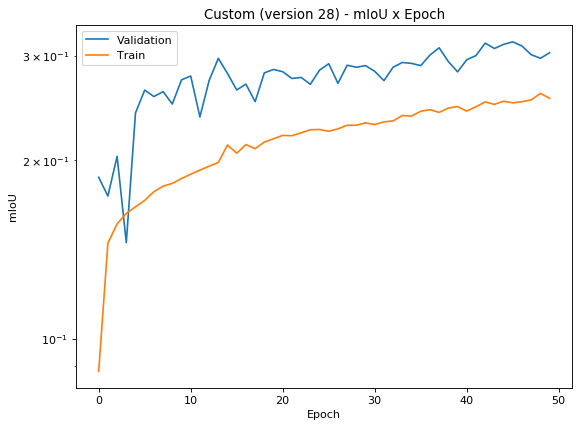

In [7]:
train = ['Train Acc_epoch',   'Train Loss_epoch',   'Train dice_coef_epoch', 'Train mIoU_epoch'] 
validation = ['Validation Acc_epoch',  'Validation Loss_epoch',  'Validation dice_coef_epoch', 'Validation mIoU_epoch']
labels = ['Accuracy', 'Loss', 'Dice Coefficient', 'mIoU']

best_model_versions = [('DeepLabv3Plus (version 5)',data_DLV3[5]),
          ('Unet (version 2)', data_unet[2]),
          ('Custom (version 28)',data_custom[28]),
         ]
 

x = np.arange(50)
for model_version in best_model_versions:
    for t,v,label in zip (train, validation, labels):
        name, m = model_version

        figure(figsize=(8, 6), dpi=80)
        plt.plot(x,m[v],label= "Validation")
        plt.plot(x,m[t],label = "Train")
        plt.xlabel("Epoch")
        plt.ylabel(label)
        plt.legend(loc = "best")
        plt.yscale("log")
        title = "{} - {}".format(name,label+" x Epoch" )
        plt.title(title)
        plt.savefig(f"figures/{title}")
    

In [8]:
custom_max = np.vstack([  data_custom[key]['Test mIoU_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test mIoU_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test mIoU_epoch'] for key in data_unet.keys()]).argmax()

In [9]:
print(np.vstack([  data_custom[key]['Test mIoU_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test mIoU_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test mIoU_epoch'] for key in data_unet.keys()]).max())

0.3893795609474182
0.25354263186454773
0.28153207898139954


In [10]:
custom_max #Focal Adam ExpLR Flair

2

In [11]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [12]:
unet_max #Focal Adam ExpLR t2

1

In [13]:
data_custom[0].keys()

dict_keys(['Test Acc_epoch', 'Test Acc_step', 'Test Loss_epoch', 'Test Loss_step', 'Test dice_coef_epoch', 'Test dice_coef_step', 'Test mIoU_epoch', 'Test mIoU_step', 'Train Acc_epoch', 'Train Acc_step', 'Train Loss_epoch', 'Train Loss_step', 'Train dice_coef_epoch', 'Train dice_coef_step', 'Train mIoU_epoch', 'Train mIoU_step', 'Validation Acc_epoch', 'Validation Acc_step', 'Validation Loss_epoch', 'Validation Loss_step', 'Validation dice_coef_epoch', 'Validation dice_coef_step', 'Validation mIoU_epoch', 'Validation mIoU_step', 'epoch', 'hp_metric'])

In [14]:
custom_max = np.vstack([  data_custom[key]['Test dice_coef_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test dice_coef_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test dice_coef_epoch'] for key in data_unet.keys()]).argmax()

In [15]:
print(np.vstack([  data_custom[key]['Test dice_coef_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test dice_coef_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test dice_coef_epoch'] for key in data_unet.keys()]).max())

0.5463778376579285
0.39441612362861633
0.4232841730117798


In [16]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [17]:
unet_max #Focal Adam ExpLR t2

1

In [18]:
custom_max #Focal Adam ExpLR Flair

2

In [19]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [20]:
unet_max #Focal Adam ExpLR t2

1

In [21]:
custom_max #Focal Adam ExpLR Flair

2

In [22]:
custom_max = np.vstack([  data_custom[key]['Test Acc_epoch'] for key in data_custom.keys()]).argmax()
DLV3_max = np.vstack([  data_DLV3[key]['Test Acc_epoch'] for key in data_DLV3.keys()]).argmax()
unet_max = np.vstack([  data_unet[key]['Test Acc_epoch'] for key in data_unet.keys()]).argmax()

In [23]:
print(np.vstack([  data_custom[key]['Test Acc_epoch'] for key in data_custom.keys()]).max())
print(np.vstack([  data_DLV3[key]['Test Acc_epoch'] for key in data_DLV3.keys()]).max())
print(np.vstack([  data_unet[key]['Test Acc_epoch'] for key in data_unet.keys()]).max())

0.6720225214958191
0.5839999318122864
0.5707069635391235


In [24]:
DLV3_max #Focal RMSProp ExpLR Flair

5

In [25]:
unet_max #Focal Adam ExpLR t2 - >  Flair

2

In [26]:
custom_max #Focal Adam ExpLR Flair - > logcosh t2

28